In [4]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA


In [11]:
# Read raw dataset
days = pd.read_csv("../data/days_cleaned.csv", index_col=0)
days.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


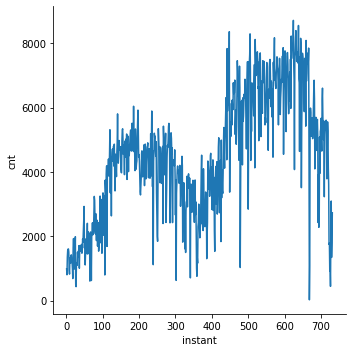

In [25]:
# Plot it
sns.relplot(x="instant", y="cnt", kind="line", data=days)

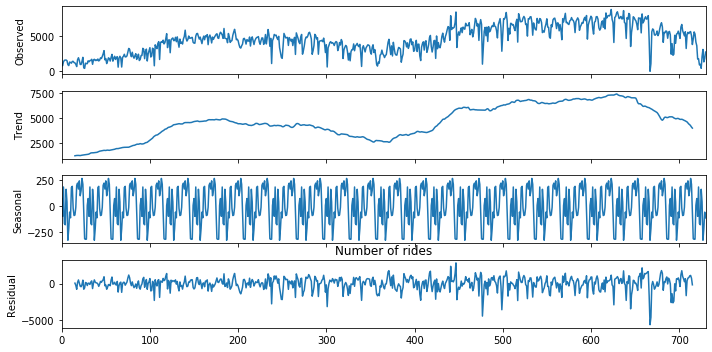

In [24]:
# Decomposition of the time serie. As the variation in the trend is more linear than exponential I apply an additive 
# decomposition
plt.rcParams["figure.figsize"] = [10, 5]
decomposed = sm.tsa.seasonal_decompose(days['cnt'], model="additive", freq=30)
decomposed_plot = decomposed.plot()

plt.title('Number of rides')

plt.show()

As the trend is kind of linearily upward and the seasonal curve is constant I was thinking of using the Holt's linear trend method but I will try ARIMA first. ????
But in order to be able to use ARIMA I need to check for Stationarity. I will do that using the Augmented Dickey Fuller test.


Hypotheses:

𝐻𝑂 : The data is not stationary

𝐻𝐴 : The data is stationary

In [27]:
adfuller(days['cnt'])

(-1.8774481444374287,
 0.3427434403392199,
 13,
 717,
 {'1%': -3.439503230053971,
  '5%': -2.8655794463678346,
  '10%': -2.5689210707289982},
 11740.390931163352)

In [26]:
# Print the p value of the test
adfuller(days['cnt'])[1]

0.3427434403392199

We can't disprove the null hypothesis H0 so our data is not stationary.
In order to apply the ARIMA method we need stationary data. In order to transform our data we will use Differencing.
We can use differencing many times untill we find that our data is stationary. The amount of time we apply differencing will give us the d (for differencing) value we need to input in the ARIMA (p,d,q) model.

In [ ]:
# Perform differencing on the data
